In [14]:
!pip install plotly

In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from scipy import stats

In [262]:
def plotit(data):
    plt.hist(data, bins=20, color='skyblue')
    plt.ylabel('Frequency')
    plt.show()
    
def getoutliers(df):
    z_scores = zscore(df)
    z_score_threshold = 3
    outliers = df[(z_scores > z_score_threshold).any(axis=1)]
    outliers = outliers.shape[0]
    return outliers

def normalize(data, z_threshold=3):
    z_scores = np.abs(stats.zscore(data))
    is_outlier = z_scores > z_threshold
    median = np.median(data)
    data[is_outlier] = median
    return data

def drop(data, z_threshold=3):
    z_scores = np.abs(stats.zscore(data))
    has_outliers = (z_scores > z_threshold).any(axis=1)
    data = data[~has_outliers]
    return data

## Analyzing Iris Data

In [263]:
iris_data=pd.read_csv("iris.csv")
iris_data = iris_data[['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']]

### Calculating Statistics

In [264]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalWidthCm   150 non-null    float64
dtypes: float64(3)
memory usage: 3.6 KB


In [265]:
iris_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.0,3.3,4.4
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5


In [266]:
iris_data.var().T

SepalLengthCm    0.685694
SepalWidthCm     0.188004
PetalWidthCm     0.582414
dtype: float64

In [267]:
iris_data.mode().T

,0
SepalLengthCm,5.0
SepalWidthCm,3.0
PetalWidthCm,0.2


In [297]:
print("Outliers: ", getoutliers(iris_data[['SepalLengthCm']]))
print("Outliers: ", getoutliers(iris_data[['SepalWidthCm']]))
print("Outliers: ", getoutliers(iris_data[['PetalWidthCm']]))

Outliers:  0
Outliers:  0
Outliers:  0


In [269]:
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalWidthCm     0
dtype: int64

### Normalizing the Noisy Data

In [270]:
iris_data['SepalLengthCm']=normalize(iris_data['SepalLengthCm'])
iris_data['SepalWidthCm']=normalize(iris_data['SepalWidthCm'])
iris_data['PetalWidthCm']=normalize(iris_data['PetalWidthCm'])

### Plotting Variable of Intrest

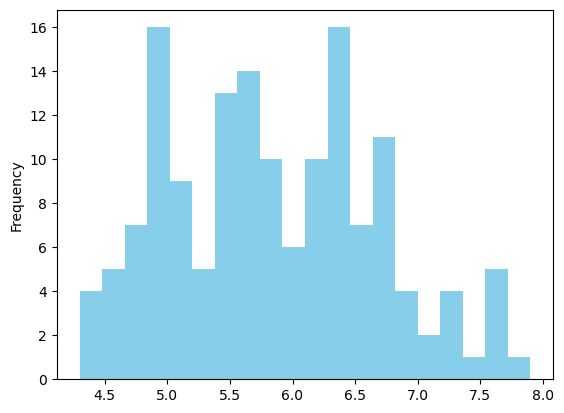

In [271]:
plotit(iris_data['SepalLengthCm'])

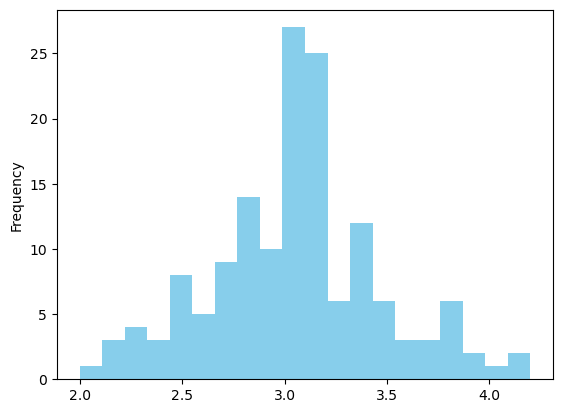

In [272]:
plotit(iris_data['SepalWidthCm'])

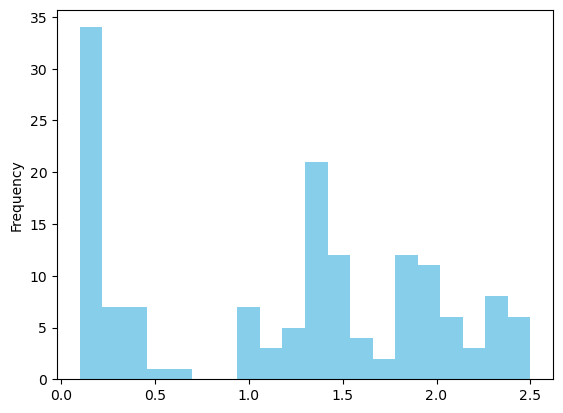

In [273]:
plotit(iris_data['PetalWidthCm'])

## Analyzing Titanic Data

In [274]:
titanic_data=pd.read_csv("titanic.csv")
titanic_data=titanic_data[['Age', 'SibSp', 'Fare']]

### Calculating Statistics

In [275]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
 1   SibSp   891 non-null    int64  
 2   Fare    891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [276]:
titanic_data.isnull().sum()

Age      177
SibSp      0
Fare       0
dtype: int64

In [277]:
titanic_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [278]:
titanic_data.var().T

Age       211.019125
SibSp       1.216043
Fare     2469.436846
dtype: float64

In [279]:
titanic_data.mode().T

,0
Age,24.00
SibSp,0.00
Fare,8.05


In [337]:
print("Outliers: ", getoutliers(titanic_data[['Age']]))
print("Outliers: ", getoutliers(titanic_data[['SibSp']]))
print("Outliers: ", getoutliers(titanic_data[['Fare']]))

Outliers:  0
Outliers:  0
Outliers:  0


### Normalizing the Data, filling the Nulls

In [311]:
titanic_data['Age'] = titanic_data.Age.fillna(titanic_data['Age'].median())
titanic_data['SibSp'] = titanic_data.SibSp.fillna(titanic_data['SibSp'].median())
titanic_data['Fare'] = titanic_data.Fare.fillna(titanic_data['Fare'].median())

### Normalizing the Noisy Data

In [336]:
titanic_data['Age']=normalize(titanic_data['Age'])
titanic_data['SibSp']=normalize(titanic_data['SibSp'])
titanic_data['Fare']=normalize(titanic_data['Fare'])

C:\Users\ahmed\AppData\Local\Temp\ipykernel_14808\3252247006.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[is_outlier] = median


### Plotting Variable of Intrest

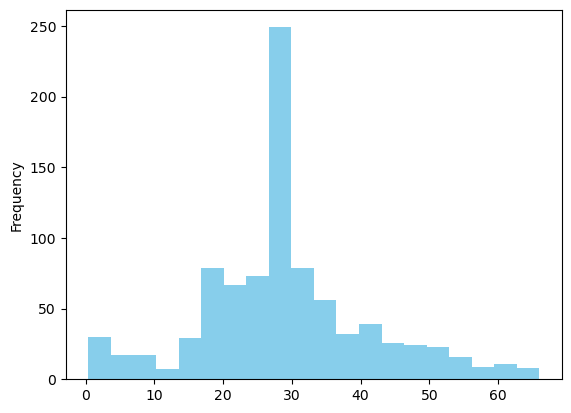

In [338]:
plotit(titanic_data['Age'])

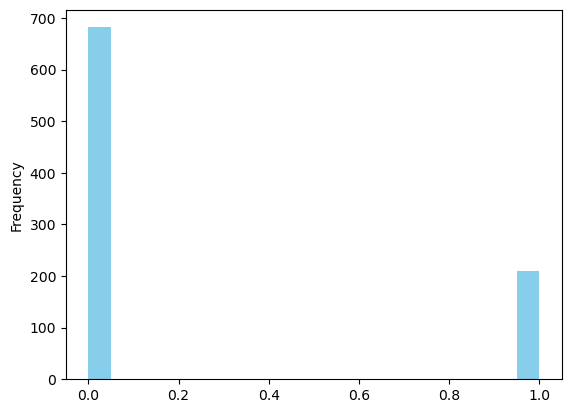

In [339]:
plotit(titanic_data['SibSp'])

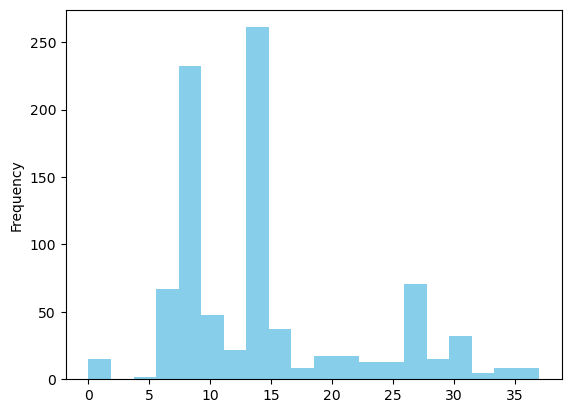

In [340]:
plotit(titanic_data['Fare'])

## Analyzing Housing Data

In [286]:
housing_data=pd.read_csv("housing.csv")
housing_data=housing_data[['area', 'price','bedrooms']]

### Calculating Statistics

In [351]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 12 to 544
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   area      515 non-null    int64
 1   price     515 non-null    int64
 2   bedrooms  515 non-null    int64
dtypes: int64(3)
memory usage: 16.1 KB


In [288]:
housing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0


In [289]:
housing_data.var().T

area        4.709512e+06
price       3.498544e+12
bedrooms    5.447383e-01
dtype: float64

In [290]:
housing_data.mode().T

,0,1
area,6000.0,NaN
price,3500000.0,4200000.0
bedrooms,3.0,NaN


In [291]:
housing_data.isnull().sum()

area        0
price       0
bedrooms    0
dtype: int64

In [350]:
print("Outliers: ", getoutliers(housing_data[['area']]))
print("Outliers: ", getoutliers(housing_data[['price']]))
print("Outliers: ", getoutliers(housing_data[['bedrooms']]))

Outliers:  0
Outliers:  0
Outliers:  0


### Normalizing the Noisy Data

In [349]:
housing_data = drop(housing_data)

### Plotting Variable of Intrest

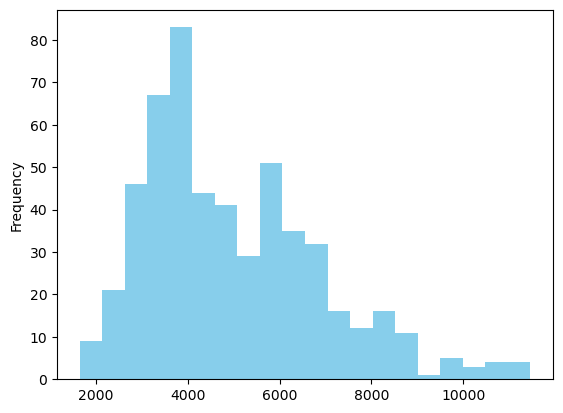

In [344]:
plotit(housing_data['area'])

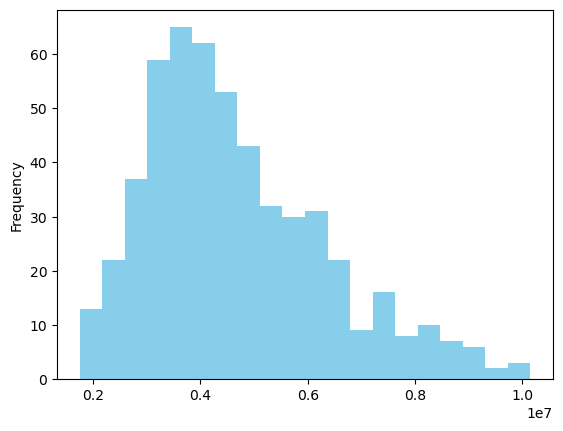

In [295]:
plotit(housing_data['price'])

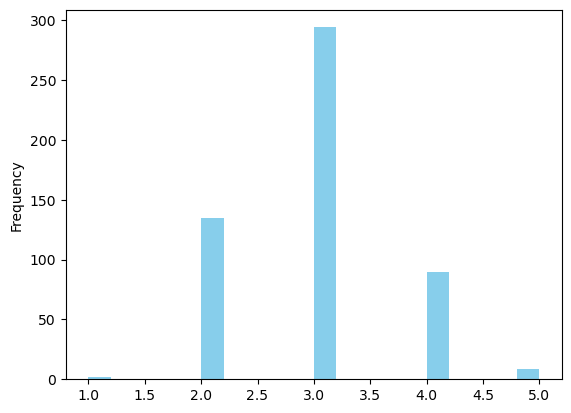

In [296]:
plotit(housing_data['bedrooms'])